<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Retrieve-local-descriptor" data-toc-modified-id="Retrieve-local-descriptor-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Retrieve local descriptor</a></span></li><li><span><a href="#Segmentation-(menus)" data-toc-modified-id="Segmentation-(menus)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Segmentation (menus)</a></span><ul class="toc-item"><li><span><a href="#Food-Menu-Info" data-toc-modified-id="Food-Menu-Info-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Food Menu Info</a></span></li><li><span><a href="#Drink-Menu-Info" data-toc-modified-id="Drink-Menu-Info-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Drink Menu Info</a></span></li></ul></li><li><span><a href="#Map-how-many-images-in-the-category-we-have" data-toc-modified-id="Map-how-many-images-in-the-category-we-have-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Map how many images in the category we have</a></span><ul class="toc-item"><li><span><a href="#Drink-Menu" data-toc-modified-id="Drink-Menu-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Drink Menu</a></span></li></ul></li><li><span><a href="#Image-Augmentation" data-toc-modified-id="Image-Augmentation-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Image Augmentation</a></span></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#PCA" data-toc-modified-id="PCA-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>PCA</a></span><ul class="toc-item"><li><span><a href="#Select-the-PCA-component-number-(through-variance-%)" data-toc-modified-id="Select-the-PCA-component-number-(through-variance-%)-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Select the PCA component number (through variance %)</a></span></li></ul></li><li><span><a href="#Generate-different-PCA-sets" data-toc-modified-id="Generate-different-PCA-sets-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Generate different PCA sets</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#The-elbow-method" data-toc-modified-id="The-elbow-method-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>The elbow method</a></span></li></ul></li><li><span><a href="#Feature-matching" data-toc-modified-id="Feature-matching-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature matching</a></span></li></ul></div>

# Setup

In [ ]:
!/home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip -V

In [ ]:
# setup to see the execution time in each cell

!/home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip install ipython-autotime
!/home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip install directory_structure
!/home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip install handcalcs
!/home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip install pytz
!/home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip install skimage
# !/home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip install opencv-contrib-python==4.4.0.44
# %load_ext autotime

In [1]:
import pandas as pd
import os
import random
import glob
import PIL
from PIL import Image
import numpy as np
from numpy import mean
# import cupy as cp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
# from google.colab.patches import cv2_imshow
# from directory_structure import Tree
import shutil
# import handcalcs.render
import pickle

import matplotlib.pyplot as plt
# from skimage import draw

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# from cuml.cluster import KMeans

In [2]:
print (cv2.__version__)

4.5.5


# Preprocessing

Use this if you are using Google Colab.

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# replace the dir if needed

ROOT_DIR = "/home/hui/Projects/g5/datasets"  # Henry's dir
# ROOT_DIR = "/content/drive/MyDrive/Project - G5/Dataset/"    #Lejia's dir
# ROOT_DIR = "/content/drive/MyDrive/Project - G5/Dataset/" #Nan's dir
# ROOT_DIR = "/content/drive/MyDrive/Project - G5/Dataset"

SAVE_DE_DIR = ROOT_DIR + "/descriptors"
RESIZE_DIR = ROOT_DIR + "/augmentation/resize"

MENU_FOOD = ROOT_DIR + "/MeetFresh_menu_food_2.csv"
MENU_DRINK = ROOT_DIR + "/MeetFresh_menu_drink_2.csv"

## Retrieve local descriptor

In [5]:
def retrieve_stored_descriptor(product_name: str):
    # retrieve a stored local descriptor based on given name
    try:
        file_path = SAVE_DE_DIR + "/" + product_name + ".txt"
        file = open(file_path, 'rb')
        descriptor = pickle.load(file)
        file.close()
        return descriptor
    except FileNotFoundError:
        print("Wrong file name or path")
        return None
    except e:
        print("Error due to: {}".format(e))
        return None

## Segmentation (menus)

In [6]:
df_food = pd.read_csv(MENU_FOOD, skiprows=1)
df_drink = pd.read_csv(MENU_DRINK, skiprows=1)

In [101]:
df_drink["Item Name (ENG)"] == "Black Sugar Boba Fresh MIlk"

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20     True
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
Name: Item Name (ENG), dtype: bool

### Food Menu Info

In [7]:
df_food.columns

Index(['Item ID', 'Menu Category', 'Item Name (CHN)', 'Item Name (ENG)', 'Hot',
       'Cold', 'Size', 'Kcal', 'Egg Allergen', 'Peanut Allergen', 'Top Seller',
       'Seasonal', 'Taro Balls', 'Taro Paste', 'Potaro Balls', 'Boba',
       'Shaved Ice', 'Grass Jelly', 'Grass Jelly Shaved Ice', 'Ice Cream',
       'Sesame Rice Balls', 'Rice Balls', 'Taro', 'Red Beans', 'Peanuts',
       'Melon Jelly', 'Red Bean Soup', 'Mini Q', 'Grass Jelly Soup',
       'Almond Flakes', 'Almond Pudding', 'Almond Soup', 'Caramel Pudding',
       'Q Mochi', 'Black Sugar Boba', 'Milk Tea Sauce', 'Strawberry', 'Mango',
       'Egg Waffle', 'Matcha Egg Waffle', 'Chocolate Egg Waffle',
       'Chocolate Chips', 'Matcha Red Bean', 'Mixed Nuts',
       'Chocolate Wafer Rolls', 'Chocolate Syrup'],
      dtype='object')

In [8]:
df_food["Menu Category"].value_counts()

Tofu Pudding        18
Shaved Ice          16
Small Bites          8
Egg Waffle           7
Signature Series     6
Create Your Own      5
Name: Menu Category, dtype: int64

In [9]:
len(df_food["Menu Category"].unique())

6

### Drink Menu Info

In [10]:
df_drink.columns

Index(['Item ID', 'Menu Category', 'Item Name (CHN)', 'Item Name (ENG)', 'Hot',
       'Cold', 'Kcal', 'Full Sugar', 'Half Sugar', 'No Sugar', 'Fixed Sugar',
       'Black Tea', 'Green Tea', 'Oolong Tea', 'Jin Xuan Oolong', 'Herbal Tea',
       'Winter Melon Tea', 'Almond Drink', 'Fresh Milk', 'Milk', 'Boba',
       'Taro Paste', 'Black Sugar Boba', 'Grass Jelly', 'Pudding', 'Mini Q',
       'Lychee Jelly', 'Melon Jelly', 'Mango', 'Mixed Fruit', 'Strawberry',
       'Fluffly Creamer', 'Lemon', 'Passion Fuit', 'Orange', 'Red Bean Soup',
       'Hot Grass Jelly', 'Top Seller', 'Peanut'],
      dtype='object')

In [11]:
df_drink["Menu Category"].value_counts()

Milk Teas            10
Fluffy                7
Fruit Series          7
Winter Melon Teas     6
Teas                  4
Herbal Teas           4
Fresh Milk            4
Slush                 4
Almond Drink          1
Name: Menu Category, dtype: int64

In [12]:
len(df_drink["Menu Category"].unique())

9

## Map how many images in the category we have

### Drink Menu

In [117]:
org_dir = ROOT_DIR + "/cv2"
org_files = os.listdir(org_dir)

unique_list = list()

for item in org_files:
    temp_df = df_drink.loc[(df_drink["Item Name (ENG)"] == item.split(".")[0])]
    # print("Name: {} ==> {}".format(item, temp_df["Menu Category"]))
    if len(temp_df["Menu Category"].values) > 0:
        unique_list.append(temp_df["Menu Category"].values[0])
    # break

    
print(dict((x,unique_list.count(x)) for x in set(unique_list)))

{'Almond Drink': 1, 'Herbal Teas': 3, 'Milk Teas': 10, 'Winter Melon Teas': 6, 'Teas': 4, 'Fruit Series': 4, 'Fluffy': 7, 'Slush': 4, 'Fresh Milk': 3}


## Image Augmentation

Some of the images are not in the same size (pixel), therefore, we need to perform image augmentation (resize and do not preserve aspect ratio) in order to have all images in the same pixel size (width and height).

In [15]:
def resize_image(img, w, h):
    # resize while do not preserve aspect ratio
    return cv2.resize(img, (w, h), interpolation=cv2.INTER_AREA)

img_dir = ROOT_DIR + "/cv2"
img_files = os.listdir(img_dir)

if not os.path.exists(RESIZE_DIR):
    os.makedirs(RESIZE_DIR)

for img in img_files:
    # print(img)
    image = cv2.imread(img_dir + "/" + img)
    resized_img = resize_image(image, 256, 256)
    cv2.imwrite(RESIZE_DIR+"/"+str(img), resized_img)

print(">>> All jobs done!")

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


>>> All jobs done!


# Feature Engineering

## PCA

In [43]:
imgs_files = os.listdir(RESIZE_DIR)

x = list()

for img in imgs_files:
    # retrieve the img data
    img_ = cv2.imread(RESIZE_DIR + "/" + img)
    
    # apply flatten
    x.append(np.array(img_).flatten())
#     x.append(np.array(img_))

x = np.array(x)

print(">>> All jobs done!")

>>> All jobs done!


In [44]:
x[0].shape

(196608,)

In [31]:
img_dir = ROOT_DIR + "/cv2"
org_files = os.listdir(img_dir)

org_img = cv2.imread(img_dir + "/" + org_files[0])
print("Original image size: {}".format(org_img.shape))

Original image size: (2234, 2355, 3)


In [28]:
resize_files = os.listdir(RESIZE_DIR)
                        
org_img = cv2.imread(RESIZE_DIR + "/" + resize_files[0])
print("Original image size: {}".format(org_img.shape))

Original image size: (256, 256, 3)


In [33]:
x[0].shape

(2234, 2355, 3)

In [21]:
# counter = 0

# for i in x:
#     print("{} ==> {}".format(counter, len(i)))
#     counter += 1

In [34]:
# x_stack = [desc for img in x for desc in img]
# x_ = np.array(x_stack)
# x_ = x_.reshape(1, -1)

In [45]:
pca = PCA()

x_pca = pca.fit_transform(x)

In [46]:
import matplotlib.pyplot as plt
import plotly.express as px

In [47]:
# print("Original X test shape: {}".format(np.array(x_test).shape))
print("X shape after PCA: {}".format(x_pca.shape))

X shape after PCA: (92, 92)


In [48]:
x_pca_ = x_pca.reshape(1, -1)
print("X shape after PCA: {}".format(x_pca_.shape))

X shape after PCA: (1, 8464)


In [49]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
exp_var_cumul_round = np.round_(exp_var_cumul, decimals = 4)
print(exp_var_cumul_round)

[0.2456 0.3529 0.4423 0.5154 0.571  0.6225 0.6528 0.678  0.6981 0.7177
 0.7354 0.752  0.7654 0.7781 0.7902 0.8007 0.8104 0.8199 0.8288 0.8373
 0.8451 0.8528 0.8599 0.8666 0.873  0.8793 0.885  0.8905 0.8957 0.9008
 0.9057 0.9104 0.915  0.9196 0.9238 0.9279 0.9319 0.9357 0.9393 0.9426
 0.9458 0.9489 0.9519 0.9547 0.9573 0.9597 0.962  0.9643 0.9664 0.9686
 0.9706 0.9726 0.9745 0.9762 0.9779 0.9794 0.9808 0.9822 0.9834 0.9845
 0.9856 0.9866 0.9876 0.9884 0.9892 0.9901 0.9909 0.9916 0.9923 0.993
 0.9936 0.9943 0.9949 0.9954 0.996  0.9965 0.9969 0.9973 0.9977 0.9981
 0.9984 0.9988 0.999  0.9993 0.9995 0.9997 0.9999 0.9999 1.     1.
 1.     1.    ]


In [50]:
# get a list of # of components
num_comp = range(1, exp_var_cumul_round.shape[0] + 1)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)

In [52]:
fig = px.line(
    x=num_comp,
    y=exp_var_cumul_round,
    labels={"x": "# Components", "y": "Cumulative Explained Variance"},
    title = "# of components V.S. variance",
    # markers=True
)

fig.show()

As we can see from the cumulative PCA that dimension has reduced significantly. Therefore, we will select the following option variances (%): 100, 99, 97, 95, 90, 80, 70.

### Select the PCA component number (through variance %)

In [53]:
pca_variance_perc = [100, 99, 97, 95, 90, 80, 70]
pca_num_comp = [92, 66, 51, 42, 30, 16, 9]

## Generate different PCA sets

In [55]:
x_pca = list()

for i in range(len(pca_variance_perc)):
    
    # init the PCA to the corresponding variance %
    pca = PCA(n_components=pca_num_comp[i])
    
    x_pca.append(
        {
            "explained_variance": pca_variance_perc[i],
            "pca_set": pca.fit_transform(x)
        }
    )

print(">>> All jobs done!")

>>> All jobs done!


# Model

## The elbow method

In [58]:
def elbow(x):
    '''
    PURPOSE:
        Compute WCSS from 1 to 10 in order to find the optimal number of clusters
    
    INPUT:
    x: matrix
        matrix of input features
    
    OUTPUT:
    wcss: list
        a list of wcss val from 1 ~ 10 clusters
    '''
    wcss = list()
    
    for i in range(1, 11):
        # intial with K-Means++ to avoid initalization trap
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        
        x_stack = [desc for img in x for desc in img]
        all_x = np.array(x_stack, dtype=np.float32)
        all_x = all_x.reshape(-1, 1)
        
        # train the matrix features
        kmeans.fit(all_x)
        
        # get the WCSS val
        wcss.append(kmeans.inertia_)
    
    return wcss

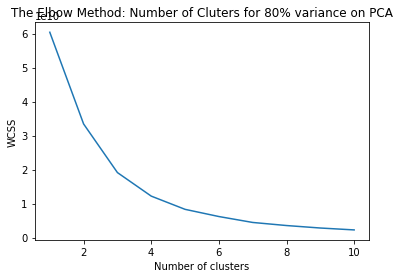

In [118]:
index = 5

WCSS = elbow(x_pca[index]["pca_set"])

plt.plot(range(1, 11), WCSS)
title = "The Elbow Method: Number of Cluters for " + str(x_pca[index]["explained_variance"]) + "% variance on PCA" 
plt.title(title)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# Feature matching

In [ ]:
# # feature matching

# # instantiate a Brute-force matcher with L1 norm
# bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

# # match the two descriptors
# matches = bf.match(de1, de2)

# # sort the match result based on feature vector distance
# matches = sorted(matches, key=lambda x: x.distance)

# # draw the match image (cross reference) and then display it
# img3 = cv2.drawMatches(cv2.imread(img1),
#                        kp1,
#                        cv2.imread(img2),
#                        kp2,
#                        matches[:50],
#                        cv2.imread(img2),
#                        flags=2)
# # img=mpimg.imread('stinkbug.png')
# plt.imshow(img3), plt.show()

In [ ]:
# dir(matches[0])

In [ ]:
# def match_products(product_1, product_2):
#     # instantiate a Brute-force matcher with L1 norm
#     bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

#     # match the two descriptors
#     matches = bf.match(retrieve_stored_descriptor(product_1), retrieve_stored_descriptor(product_2))

#     # sort the match result based on feature vector distance
#     matches = sorted(matches, key=lambda x: x.distance)
    
#     return matches

In [ ]:
# PRODUCT_NAME_1 = "Fluffy Green Tea"
# PRODUCT_NAME_2 = "Fluffy Jin Xuan Tea"

# index = 1

# print("Feature {} distance is {}".format(index, match_products(PRODUCT_NAME_1, PRODUCT_NAME_2)[1].distance))

In [ ]:
# retrieve_stored_descriptor(PRODUCT_NAME_1).shape

In [ ]:
# retrieve_stored_descriptor(PRODUCT_NAME_2).shape

A list of things we need to consider here:
- Mean
- Median

- Distance formula (Euclidean distance)

- Visualization (feature matrix)

- Clustering

In [ ]:
# # attempt of using the mean of the all distances
# from numpy import mean, median

# matches_results = [item.distance for item in match_products(PRODUCT_NAME_1, PRODUCT_NAME_2)]

# dist_mean = mean(matches_results)
# dist_median = median(matches_results)
    
# print("Mean: {}".format(dist_mean))
# print("Median: {}".format(dist_median))

In [ ]:
# temp = {
#     "matches": matches_results
# }
# df = pd.DataFrame(temp)

# df.info()

In [ ]:
# # ax = (df["matches"]).plot.box()
# ax = df.boxplot(column=["matches"], vert=False)
# ax.set_xlabel("Feature Match Distance")

In [ ]:
# def comparable_ovr(target_, return_mode=-1, sort=False):
#     '''
#     Comparing one-vs-rest product. aka, one vs all other products on the records.

#     INPUTS:
#         target_: str
#             target product name
#         return_mode: int
#             what kind of list you want to have as return.
#             -1: just the mean
#             0: both the mean and median (two lists)
#             1: just the median
#         sort: boolean
#             sort the return result in ASC or DESC
#             False: return in ASC
#             True: return in DESC

#     OUTPUTS:
#         results: list
#             The desired results from the computation based on the given return mode value.
#             If the return mode is in the incorrect number, it will return None.
#     '''

#     ACCEPTED_RETURN_MODE = [-1, 0, 1]

#     if return_mode not in ACCEPTED_RETURN_MODE:
#         return None

#     # get a full list of the products
#     stored_descriptors = os.listdir(SAVE_DE_DIR)

#     results_mean = list()
#     results_median = list()

#     # go through all products
#     for i in range(len(stored_descriptors)):

#         # if it is the product itself, simply skip it
#         if stored_descriptors[i] == target_:
#             pass

#         # compute the match
#         matches_results_listing = [item.distance for item in match_products(
#             target_, stored_descriptors[i].split(".")[0])]

#         # store the mean and median results
#         results_mean.append(mean(matches_results_listing))
#         results_median.append(median(matches_results_listing))
#     # end for

#     # sort the results
#     if sort:
#         results_mean.sort(reverse=True)
#         results_median.sort(reverse=True)

#     if return_mode == -1:
#         return results_mean
#     elif return_mode == 0:
#         return results_mean, results_median
#     else:
#         return results_median

<b>Testing</b>

Give a product name, match it against the other products, and then plot the mean and median based on the "comparable_ovr" func. The less the distance is, the closer the two products look alike.

In [ ]:
# test_product = "Q Mochi"

# results_mean, results_median = comparable_ovr(test_product, return_mode=0, sort=True)

# temp = {
#     "matches_mean": results_mean,
#     "matches_median": results_median,
# }
# df2 = pd.DataFrame(temp)

# ax = df2.boxplot(column=["matches_mean"], vert=False)
# ax.set_title("Box plot for " + test_product)
# ax.set_xlabel("Feature Match Distance (mean)")

In [ ]:
# ax = df2.boxplot(column=["matches_median"], vert=False)
# ax.set_title("Box plot for " + test_product)
# ax.set_xlabel("Feature Match Distance (median)")

In [ ]:
# print(dir(retrieve_stored_descriptor(test_product)))

In [ ]:
# retrieve_stored_descriptor(test_product).shape

In [ ]:
# retrieve_stored_descriptor(test_product).view()

In [ ]:
# arr = retrieve_stored_descriptor(test_product)
# rr, cc = draw.circle_perimeter(100, 100, radius=80, shape=arr.shape)
# arr[rr, cc] = 1
# plt.imshow(arr)
# plt.show()